# Levarage PubChem IDs for predicting the Dopamine D1 receptor antagonists. 

### Content   <a name="content"></a>

1. [Upload and analyse PubChem BioAssay AID 504652 on D1 receptor ](#1)
2. [Create a data frame with CIDs, SIDs and targets](#2)
3. [Upload and analyse PubChem BioAssay AID 1996 on water solubility ](#3)
4. [Create the final data frame, crossing the data frame holding the targets with the water solubility data frame](#4)
5. [Machine learning](#5)
6. [Cross validation](#6)
7. [Hyperparameter tuning](#7)
8. [Scrutinise for overfitting](#8)
9. [Plot learning curve and AUC](#9)
10. [Confusion matrix, classification report](#10)

## Upload and analyse PubChem BioAssay AID 504652 on D1 receptor <a name="1"></a>

In [1]:
import pandas as pd 

# load the BioAssay PubChem AID 504332 dataset
df_targets = pd.read_csv('input/bioassy_PubChem_D1.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of the data frame: ', df_targets.shape)
df_targets.head()

Shape of the data frame:  (359035, 10)


,PUBCHEM_RESULT_TAG,SID,CID,SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activity at 10.0 uM,Compound QC
0,1,14737807,9551164.0,C1CCC2=C(C1)C3=C(S2)N=C4C(=CC=CN4C3=O)C(=O)NCC...,Active,50,NaN,NaN,-112.471,NaN
1,2,855827,4917.0,CN1CCN(CC1)CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)Cl,Active,50,NaN,NaN,-111.528,NaN
2,3,56463488,4350931.0,CN1CCC2=CC=CC=C2CC3=C(CC1)C4=CC=CC=C4N3,Active,50,NaN,NaN,-106.814,NaN
3,4,56463458,11957685.0,CC1=CC(=CC=C1)C2CN(CCC3=C(C(=C(C=C23)O)O)Cl)C.Br,Active,50,NaN,NaN,-106.293,NaN
4,5,855962,6602611.0,C1CN(CCN1CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)C(F)(F...,Active,50,NaN,NaN,-106.287,NaN


In [2]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359035 entries, 0 to 359034
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PUBCHEM_RESULT_TAG         359035 non-null  int64  
 1   SID                        359035 non-null  int64  
 2   CID                        359034 non-null  float64
 3   SMILES                     359034 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME   359035 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE     359035 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL       0 non-null       float64
 7   PUBCHEM_ASSAYDATA_COMMENT  0 non-null       float64
 8   Activity at 10.0 uM        359035 non-null  float64
 9   Compound QC                0 non-null       float64
dtypes: float64(5), int64(3), object(2)
memory usage: 27.4+ MB


In [3]:
# Remove duplicates 
df_targets.drop_duplicates()
df_targets.shape  # 353737 means no duplicates

(359035, 10)

In [4]:
# Remove compounds with missing CID-s
df_targets = df_targets[df_targets['CID'].notna()]
df_targets.shape

(359034, 10)

In [5]:
# Remove compounds with missing SID-s
df_targets = df_targets[df_targets['SID'].notna()]
df_targets.shape

(359034, 10)

In [6]:
import numpy as np
# Turn CID float data type into integer
df_targets['CID'] = df_targets['CID'].astype(np.int64) 
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359034 entries, 0 to 359034
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PUBCHEM_RESULT_TAG         359034 non-null  int64  
 1   SID                        359034 non-null  int64  
 2   CID                        359034 non-null  int64  
 3   SMILES                     359034 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME   359034 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE     359034 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL       0 non-null       float64
 7   PUBCHEM_ASSAYDATA_COMMENT  0 non-null       float64
 8   Activity at 10.0 uM        359034 non-null  float64
 9   Compound QC                0 non-null       float64
dtypes: float64(4), int64(4), object(2)
memory usage: 30.1+ MB


In [7]:
# Set the binary targets to "1" for an active inhibitors and "0" for others 
df_targets = df_targets.copy()

# Create a dictionary
target = {'Active' : 1,
          'Inactive' : 0}

# Replace the names with binary values set up in the dictionary targets
df_targets.PUBCHEM_ACTIVITY_OUTCOME = [target[item] for item in df_targets.PUBCHEM_ACTIVITY_OUTCOME]

# Rename "unique combination" into "target"
df_targets = df_targets.rename(columns={'PUBCHEM_ACTIVITY_OUTCOME': 'target'})

# Check how many unique values there are in the 'target' column
df_targets['target'].unique()

array([1, 0], dtype=int64)

[<a href="#content">Back to top</a>]

## Create a data frame with CIDs, SIDs and targets <a name="2"></a>

In [8]:
# Create a data frame containing the classification targets
df_targets = df_targets [['CID', 'SID', 'target']]

# Display the data frame
print('Shape of df_targets : ', df_targets .shape)
df_targets .head()

Shape of df_targets :  (359034, 3)


,CID,SID,target
0,9551164,14737807,1
1,4917,855827,1
2,4350931,56463488,1
3,11957685,56463458,1
4,6602611,855962,1


In [9]:
df_targets['target'].value_counts()

target
0    347568
1     11466
Name: count, dtype: int64

In [10]:
# Creat a dataframe with full set of target 1 for latter use
df_targets_1 = df_targets[df_targets['target']==1]

[<a href="#content">Back to top</a>]

## Upload and analyse PubChem BioAssay AID 1996 on water solubility <a name="3"></a>

In [11]:
# Load data from PubChem BioAssay AID 1996 
df_solubility = pd.read_csv('input/pubchem_solubility.csv')

# Display the data frame
print('Shape of df_solubility: ', df_solubility.shape)
df_solubility.head()

Shape of df_solubility:  (57859, 30)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Solubility at pH 7.4_Qualifier_Mean,Solubility at pH 7.4_Mean,Test Concentration_1,Solubility at pH 7.4_Qualifier_1,Solubility at pH 7.4_1,Solubility at pH 7.4_Comment_1,Solubility of Astemizole at pH 7.4_Qualifier_1,Solubility of Astemizole at pH 7.4_1,Solubility of Sulfamethizole at pH 7.4_Qualifier_1,Solubility of Sulfamethizole at pH 7.4_1,Solubility of Imipramine HCl at pH 7.4_Qualifier_1,Solubility of Imipramine HCl at pH 7.4_1,Test Concentration_2,Solubility at pH 7.4_Qualifier_2,Solubility at pH 7.4_2,Solubility at pH 7.4_Comment_2,Solubility of Astemizole at pH 7.4_Qualifier_2,Solubility of Astemizole at pH 7.4_2,Solubility of Sulfamethizole at pH 7.4_Qualifier_2,Solubility of Sulfamethizole at pH 7.4_2,Solubility of Imipramine HCl at pH 7.4_Qualifier_2,Solubility of Imipramine HCl at pH 7.4_2
0,1,24826444,2374148,COC1=CC=C(C=C1)OCC2=NNC(=S)N2N,Active,40,NaN,NaN,=,10.85,200,<,0.1,Below LOQ,=,14.2,>,40.5,>,47.5,200.0,=,21.6,NaN,=,27.7,>,40.5,>,47.5
1,2,49669186,5295761,CC1=CC(=C(C=C1)NC2=NC3=CC=CC=C3N4C2=NN=C4)Cl,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,49669768,22431387,CC1=CC(=CC=C1)CCNC2=NC3=C(C=C(C=C3)C)N4C2=NN=C4,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8139962,14296,CC1=C(N=C(C(=N1)C)C)C,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24803435,865684,CC1=CC2=NC(=C(C=C2C=C1)C#N)NC3=CC=CC=C3OC,Inactive,0,NaN,NaN,<,0.20,200,<,0.2,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57859 entries, 0 to 57858
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   PUBCHEM_RESULT_TAG                                  57859 non-null  int64  
 1   SID                                                 57859 non-null  int64  
 2   CID                                                 57859 non-null  int64  
 3   PUBCHEM_EXT_DATASOURCE_SMILES                       57859 non-null  object 
 4   OUTCOME                                             57859 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE                              57859 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL                                0 non-null      float64
 7   PUBCHEM_ASSAYDATA_COMMENT                           0 non-null      float64
 8   Solubility at pH 7.4_Qualifier_Mean                 57859 non-null  object 


In [13]:
# Create the desired data frame with CID and SID for sifting 
df_solubility = df_solubility[['SID', 'CID']]

# Display the data frame
print('Shape of the data frame: ', df_solubility.shape)
df_solubility.head()

Shape of the data frame:  (57859, 2)


,SID,CID
0,24826444,2374148
1,49669186,5295761
2,49669768,22431387
3,8139962,14296
4,24803435,865684


[<a href="#content">Back to top</a>]

## Create the final data frame, crossing the data frame holding the targets with the water solubility data frame  <a name="4"></a>

In [14]:
# Sift the main data frame with targets using the solubility data frame 
df = pd.merge(df_targets, df_solubility, on=["CID", "SID"])

# Display the data frame
print('Shape of the data frame: ', df.shape)
df.head()

Shape of the data frame:  (49968, 3)


,CID,SID,target
0,91499,56422461,1
1,2331,11532898,1
2,7207402,24815591,1
3,1480768,49666136,1
4,2813126,26730947,1


In [15]:
# Count values of the sifted data frame 
df['target'].value_counts()

target
0    48596
1     1372
Name: count, dtype: int64

In [16]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract every nth row (e.g., every 2nd row)
n = 4
df_0 = df_0[df_0.index % n == 0] 

df_0.shape

(12149, 3)

In [17]:
# Concatenate the sifted target 0 with the original target 1
df = pd.concat([df_0, df_targets_1]).reset_index(drop=True)

# Display the data frame
print('Shape of the data frame: ', df.shape)
df.head()

Shape of the data frame:  (23615, 3)


,CID,SID,target
0,5043536,24812093,0
1,17379611,49828700,0
2,2974813,49641236,0
3,2801663,26727045,0
4,1485386,49666699,0


In [18]:
# Count the target
df['target'].value_counts()

target
0    12149
1    11466
Name: count, dtype: int64

In [19]:
# i.e. 9036 are the samples for 20 %

In [20]:
# Shuffle the resulting data set
df = df.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

[<a href="#content">Back to top</a>]

## Machine learning <a name="4"></a>

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# # Devide the data points from targets
X = df.drop(columns=['target'], axis=1)
y = df['target']

# Split the data set into train and test parts 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, #A scaling law for the validation-set training-set ratio size" (I. Guyon, 1996, Unpublished Technical Report, AT&T Bell Laboratories).
                                                    stratify=y,
                                                    random_state=5) 

# Check class proportions (example)
print("Training set proportions:")
print(y_train.value_counts(normalize=True)) 
print("Testing set proportions:")
print(y_test.value_counts(normalize=True))

Training set proportions:
target
0    0.514451
1    0.485549
Name: proportion, dtype: float64
Testing set proportions:
target
0    0.514503
1    0.485497
Name: proportion, dtype: float64


In [22]:
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (18892, 2)
X_test:   (4723, 2)
y_train:  (18892,)
y_test:   (4723,)


In [23]:
y_test.value_counts()

target
0    2430
1    2293
Name: count, dtype: int64

[(0, 9719), (1, 9173)]


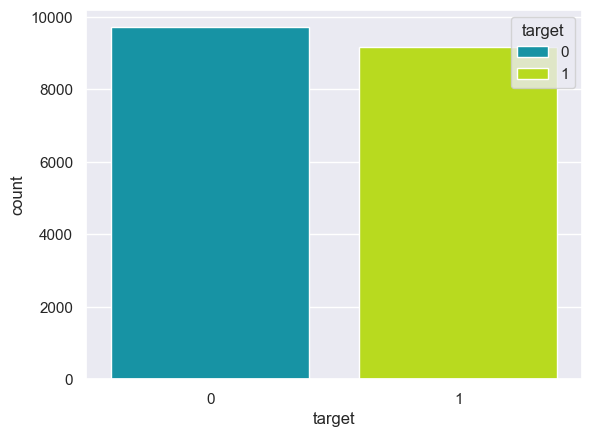

In [24]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 9719), (1, 9719)]


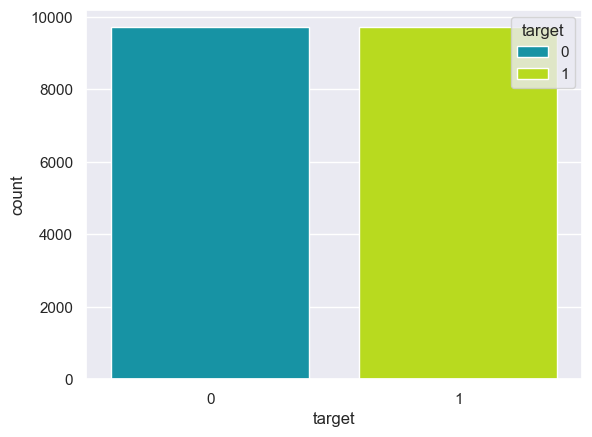

In [25]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Balance targets with Synthetic Minority Oversampling Technique
# smote = SMOTE(random_state=0)
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Illustrate the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [26]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (19438, 2)
X_test:   (4723, 2)
y_train:  (19438,)
y_test:   (4723,)


In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0),
       "K-nearest": KNeighborsClassifier(n_neighbors=3)
       }

In [28]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
4,XGBoost,0.802,0.863,0.704,0.776,0.799
3,GradientBoost,0.801,0.885,0.677,0.767,0.797
2,RandomForest,0.790,0.812,0.738,0.774,0.789
5,K-nearest,0.774,0.784,0.738,0.761,0.773
0,SVM,0.766,0.827,0.655,0.731,0.763
1,Decision,0.757,0.748,0.752,0.750,0.756


[<a href="#content">Back to top</a>]

## Cross-validation  <a name="6"></a>

In [29]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
4,XGBoost,0.8071,0.0047,"[0.8133, 0.7995, 0.8084, 0.8097, 0.8046]"
3,GradientBoost,0.8031,0.0038,"[0.8052, 0.7991, 0.8092, 0.7997, 0.8022]"
2,RandomForest,0.7903,0.0059,"[0.7957, 0.7813, 0.7957, 0.7938, 0.7853]"
5,K-nearest,0.7810,0.0036,"[0.7811, 0.7745, 0.783, 0.7853, 0.7811]"
1,Decision,0.7524,0.0090,"[0.7648, 0.7457, 0.7578, 0.7546, 0.7394]"
0,SVM,0.7439,0.0032,"[0.7434, 0.7425, 0.7502, 0.7427, 0.7408]"


[<a href="#content">Back to top</a>]

## Hyperparameter tuning  <a name="7"></a>

In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create the XGBoost classifier
xgb = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.9}
0.8031689995458112


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting  <a name="8"></a>

In [32]:
import matplotlib.pyplot as plt

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
# model_ = RandomForestClassifier(max_depth=i)
 model_ = XGBClassifier(max_depth=i,
                        colsample_bytree=1.0,
                        learning_rate=0.1,
                        min_child_weight=5,
                        n_estimators=200,
                        subsample=0.9
                       )
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.786, test: 0.787
>2, train: 0.798, test: 0.797
>3, train: 0.806, test: 0.801
>4, train: 0.813, test: 0.802
>5, train: 0.818, test: 0.802
>6, train: 0.825, test: 0.802
>7, train: 0.830, test: 0.803
>8, train: 0.834, test: 0.802
>9, train: 0.840, test: 0.800
>10, train: 0.842, test: 0.801
>11, train: 0.846, test: 0.800
>12, train: 0.849, test: 0.802
>13, train: 0.852, test: 0.800
>14, train: 0.855, test: 0.799
>15, train: 0.858, test: 0.795
>16, train: 0.859, test: 0.795
>17, train: 0.861, test: 0.793
>18, train: 0.862, test: 0.795
>19, train: 0.865, test: 0.793
>20, train: 0.864, test: 0.790


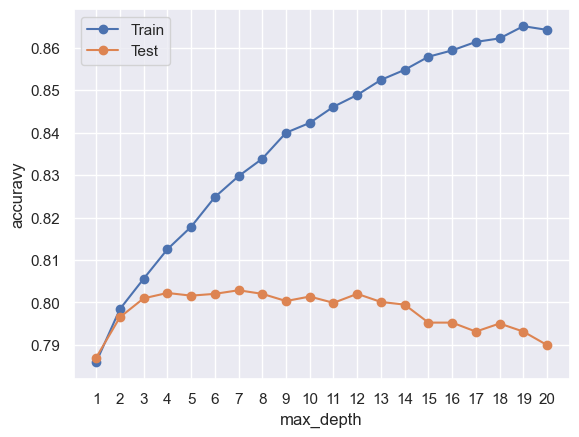

In [33]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

In [38]:
# Instantiate the mol
model= XGBClassifier(max_depth=7,
                     colsample_bytree=1.0,
                     learning_rate=0.1,
                     min_child_weight=5,
                     n_estimators=200,
                     subsample=0.9)

# Train 
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.803
Precision:  0.866
Recall:  0.703
F1:  0.776
ROC:  0.8


In [39]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
# model = RandomForestClassifier(max_depth=15)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation  scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation  scores: [0.814 0.801 0.809 0.813 0.805]
Mean cross-validation score: 0.808


[<a href="#content">Back to top</a>]

## Plot the learning curve and AUC <a name="9"></a>

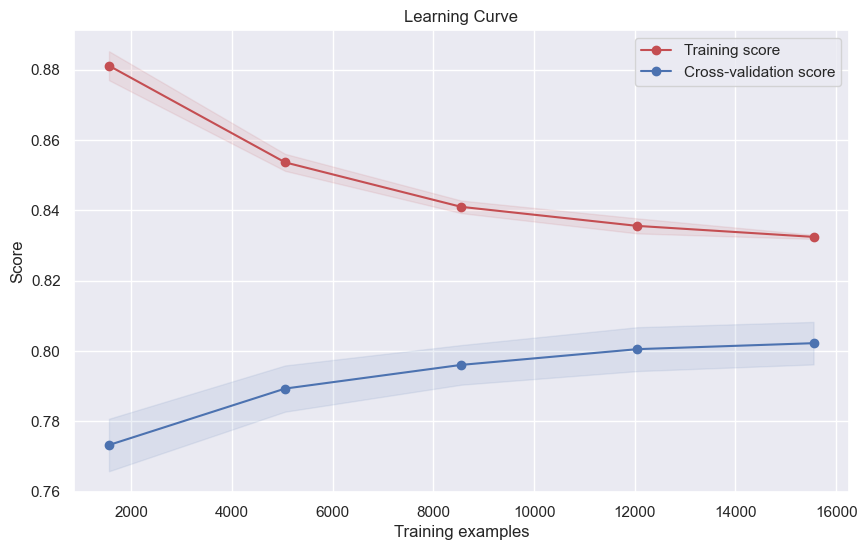

In [40]:
import xgboost as xgb
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="b",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="b", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix, classification report <a name="10"></a>

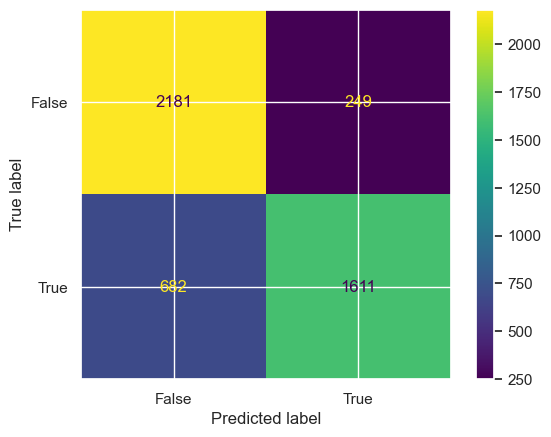

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Random forest classifier prediction
predicted = model.fit(X_train, y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [42]:
# Classification report 
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.76      0.90      0.82      2430
Inactive (target 0)       0.87      0.70      0.78      2293

           accuracy                           0.80      4723
          macro avg       0.81      0.80      0.80      4723
       weighted avg       0.81      0.80      0.80      4723



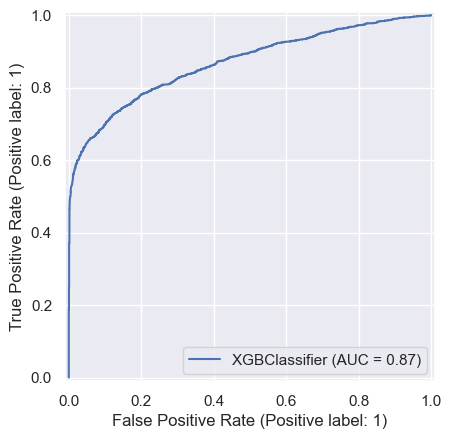

In [43]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

[<a href="#content">Back to top</a>]